In [63]:
import json
import pandas as pd

In [64]:
pref_path = "judge/result/meta-llama-Llama-3.3-70B-Instruct/preference/en_correct_zh_cn_incorrect.jsonl"
en_path = "judge/result/meta-llama-Llama-3.3-70B-Instruct/perplexity/en_correct.jsonl"
zh_path = "judge/result/meta-llama-Llama-3.3-70B-Instruct/perplexity/zh_cn_incorrect.jsonl"

In [65]:
def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f if line.strip()]

pref_dicts = read_jsonl(pref_path)
en_dicts = read_jsonl(en_path)
zh_dicts = read_jsonl(zh_path)

# Maps keyed by 'index'
pref_by_index = {d['index']: d for d in pref_dicts}

In [66]:
samples = []
error_cnt = 0
error_idx = []

for en,zh in zip(en_dicts, zh_dicts):
    pref = pref_by_index[en['index']]
    try:
        samples.append({
            'preference': pref['preference']['Ok']['preferred_answer'],
            'zh_perplexity': zh['perplexity']['Ok'],
            'en_perplexity': en['perplexity']['Ok'],
        })
    except:
        error_cnt += 1
        error_idx.append(en['index'])

In [69]:
error_cnt

3

In [67]:
import math

for sample in samples:
    sample['perplexity_diff'] = math.log10(sample['en_perplexity']) - math.log10(sample['zh_perplexity'])

for perplexity diff within [-8.320301869055392, -6.708591507118832]
winrate = 17 / 17 = 1.0

for perplexity diff within [-6.708591507118832, -5.096881145182271]
winrate = 33 / 33 = 1.0

for perplexity diff within [-5.096881145182271, -3.485170783245711]
winrate = 187 / 188 = 0.9946808510638298

for perplexity diff within [-3.485170783245711, -1.8734604213091508]
winrate = 738 / 741 = 0.9959514170040485

for perplexity diff within [-1.8734604213091508, -0.26175005937259144]
winrate = 2361 / 2420 = 0.9756198347107438

for perplexity diff within [-0.26175005937259144, 1.3499603025639697]
winrate = 3509 / 3769 = 0.9310161846643672

for perplexity diff within [1.3499603025639697, 2.961670664500531]
winrate = 1032 / 1162 = 0.8881239242685026

for perplexity diff within [2.961670664500531, 4.57338102643709]
winrate = 126 / 158 = 0.7974683544303798

for perplexity diff within [4.57338102643709, 6.18509138837365]
winrate = 43 / 50 = 0.86

for perplexity diff within [6.18509138837365, 7.79680175

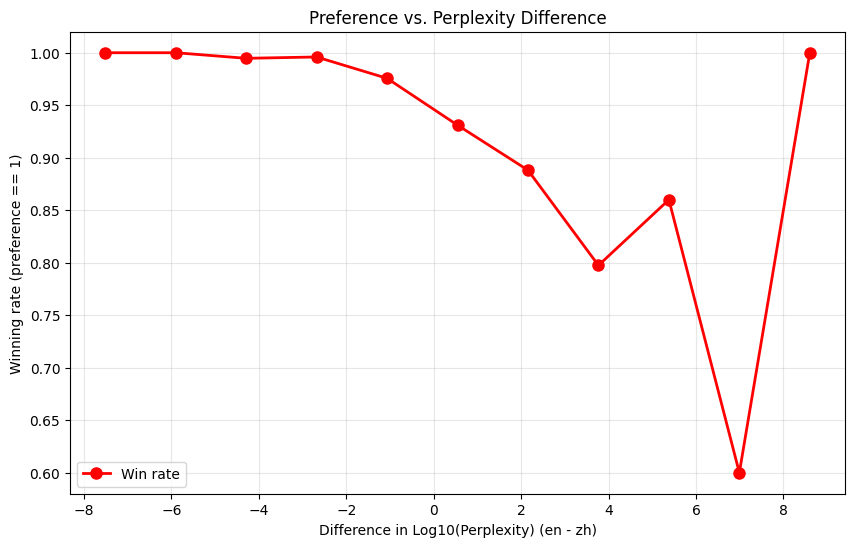

In [68]:
import numpy as np
import matplotlib.pyplot as plt

perplexity_diffs = [s['perplexity_diff'] for s in samples]
min_val, max_val = min(perplexity_diffs), max(perplexity_diffs)

bins = np.linspace(min_val, max_val, 13)
bin_centers = (bins[:-1] + bins[1:]) / 2

x_vals, win_rates = [], []
for i in range(len(bins) - 1):
    start, end = bins[i], bins[i + 1]
    items = [s for s in samples if start <= s['perplexity_diff'] < end]
    if not items:
        continue
    wins = sum(1 for s in items if s['preference'] == 1)
    rate = wins / len(items)
    print(f'for perplexity diff within [{start}, {end}]\nwinrate = {wins} / {len(items)} = {rate}\n')
    x_vals.append(bin_centers[i])
    win_rates.append(rate)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, win_rates, marker='o', linewidth=2, markersize=8, color='red', label='Win rate')
plt.xlabel('Difference in Log10(Perplexity) (en - zh)')
plt.ylabel('Winning rate (preference == 1)')
plt.title('Preference vs. Perplexity Difference')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
